# ASTR 596: FDS - The Midterm

### Dun, dun dun. 
#### (suspenseful music here)

## Start with the Cepheid data you have already seen in lecture 03 and 04.

## There are measurements of several Cepheid variable stars in each of 9 nearby galaxies.

## Begin by reading this code and familiarizing yourself with what attributes and functions are available to you. In particular, it will help to read comments at the top of the data file.

In [1]:
exec(open('cepheids.py').read())
ceph = Cepheids('../../data/03/R11ceph.dat')
hosts = ceph.list_hosts()

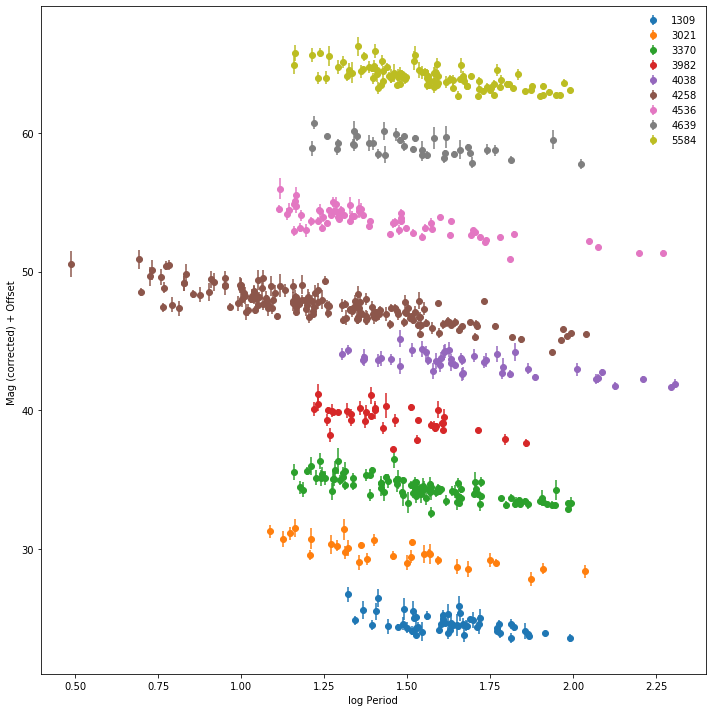

In [2]:
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

for i, ID in enumerate(hosts):
    ceph.select(ID)
    mobs = ceph.mobs
    logP = ceph.logP
    sigma_obs = ceph.sigma
    ax.errorbar(logP, mobs+(5*i), yerr=sigma_obs, linestyle='None', marker='o', label=ID)
    
ax.legend(frameon=False)
ax.set_xlabel('log Period')
ax.set_ylabel('Mag (corrected) + Offset ')
fig.tight_layout()

# Q1.

## This data was taken from [Riess et al., 2011](https://arxiv.org/abs/1103.2976)

## The global model for the magnitudes of these Cepheids is given in Equation 1. You may ignore the effect of metalicity

## Some parameters (such as distance modulus) are specific to each galaxy.

## Others are common to all galaxies. 

## Assuming Gaussian magnitude errors and no period error (and you may ignore metallicity entirely), but that Cepheids scatter off the period-luminosity relation because of some Gaussian intrinsic dispersion $\sigma_{\text{int}}$, write down your expression for the likelihood being careful to use the same indices that Riess et. al used.


Looking at `cephieds.py`, I see that the negative log likelihood is given, so it makes sense to get the likelihood from this point. It is as follows:

$$-\log L = \frac{1}{2} \chi^2$$

Rearranging for likelihood I get,

$$L = e^{-\frac{1}{2} \chi^2} $$

Then from lecture:

$$\chi^2 = \Sigma_k \frac{(m^{obs}_k - a \log P_k - b)^2}{\sigma^2_k} $$

So far so good. For this specific problem, using Equation (1) and ignoring metallicity as directed,

$$ m_{W,i,j} = (\mu_{0,i} - \mu_{0,4258}) + z p_{W,4258} + b_{W} \log P_{i,j} $$

I see that the model contains parameters $a = b_{W}$ and $b = (\mu_{0,i} - \mu_{0,4258}) + z p_{W,4258}$. Also, I'm told that there are both Gaussian magnitude errors and intrinsic dispersion, so the $\sigma$ term must include both. Going back to the $\chi^2$ then, and keeping track of indices,

$$\chi^2 = \Sigma_{i,j} \frac{(m^{obs}_{i,j} - b_{W} \log P_{i,j} - (\mu_{0,i} - \mu_{0,4258}) - z p_{W,4258})^2}{\sigma_{i,j}^2 + \sigma_{int}^2} $$

Then the likelihood $L$ is:

$$L = e^{- \frac{1}{2} \Sigma_{i,j} \frac{(m^{obs}_{i,j} - b_{W} \log P_{i,j} - (\mu_{0,i} - \mu_{0,4258}) - z p_{W,4258})^2}{\sigma_{i,j}^2 + \sigma_{int}^2}} $$

# Q2. 

## Given what you know for each of the parameters in this model, write down physically motivated (i.e. not just top hats on everything) priors, along with your explanation.

## Think particularly about the priors for distances to each galaxy.

The parameters we care about are $a$ and $b$. $a = b_W$, or the relationship bewteen the period and luminosity (according to the Reiss paper), also shown as the slope in the above figure. $b = (\mu_{0,i} - \mu_{0,4258}) + z p_{W,4258}$, where $(\mu_{0,i} - \mu_{0,4258})$ essentially encodes distance information and $z p_{W,4258}$ is the intercept of the period-luminosity relationship.

Without overthinking it, I can make some physical constraints, like distance must be positive. The period-luminosity relationship or Leavitt's law says that as period increases, luminosity also increases, and looking at how the data are plotted above, that means slope must be negative (since increasing magnitude is decreasing brightness). The magnitudes of these stars will be fainter than nearby objects, and fainter than visible-by-eye objects (call that limit 6), because they are in other galaxies. They certainly will not be negative like the sun or moon.

Just from eyeing the plot, the y-intercept ($b$) looks like $23 < b < 30$.

A quick couple estimates of rise/run shows that the slopes look about -5. I'll set a conservative range of $-10 < a < 0$.

# Q3. 

## Implement this likelihood and prior in python and sample the posterior distribution with emcee.

## Construct traceplots for each parameter, as well as corner plots for each pair of parameters.


## If your Markov Chains are reasonable, verify that your model fits are reasonable by reconstructing Fig. 7 of Riess et al. 2011

## Compare the intercept you find for the intercepts $\mu_{0,i} - \mu_{0, 4258}$ vs Table 3 of Riess et al. 2011

In [3]:
from scipy.optimize import minimize
import emcee
import corner

# changing default font sizes and family
import matplotlib as mpl
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['font.size'] = 16
mpl.rcParams['font.family'] = 'Cambria' #'serif' Cambria, Times New Roman, Georgia

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

def log_prior(theta):
    a, b = theta
    if -10 < a < 0 and 23 < b < 30:
        return 0.0
    return -np.inf

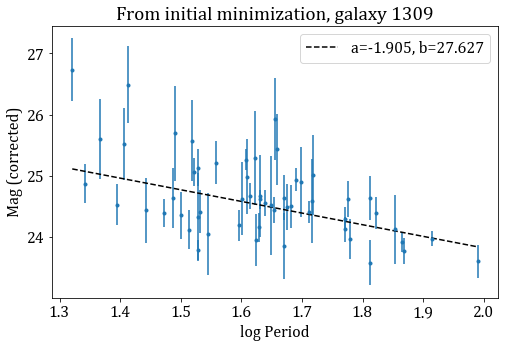

100%|██████████| 5000/5000 [00:07<00:00, 708.52it/s]


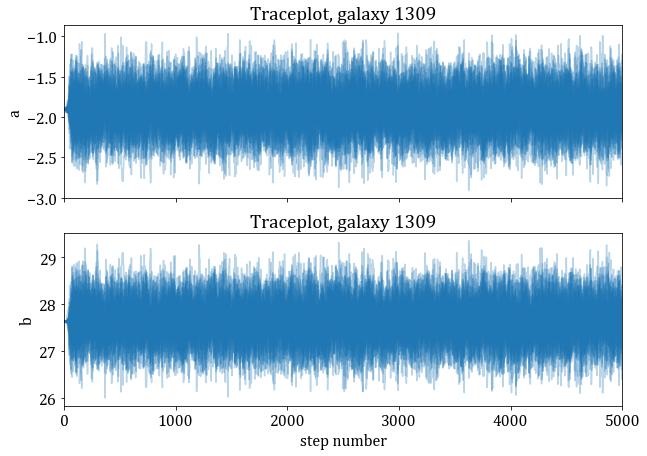

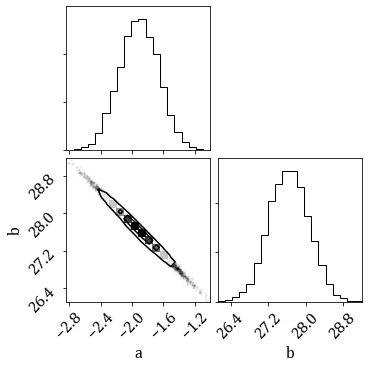

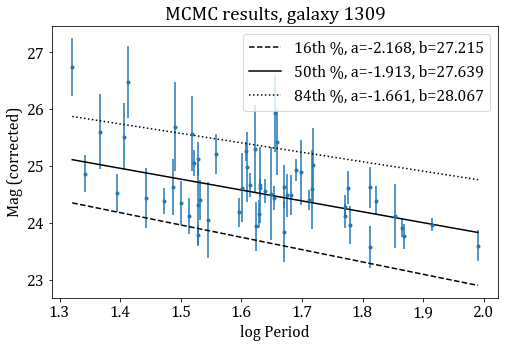

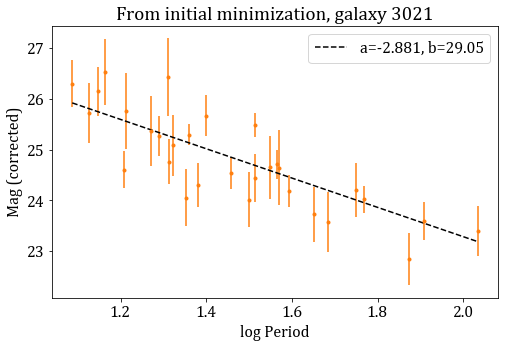

100%|██████████| 5000/5000 [00:06<00:00, 735.37it/s]


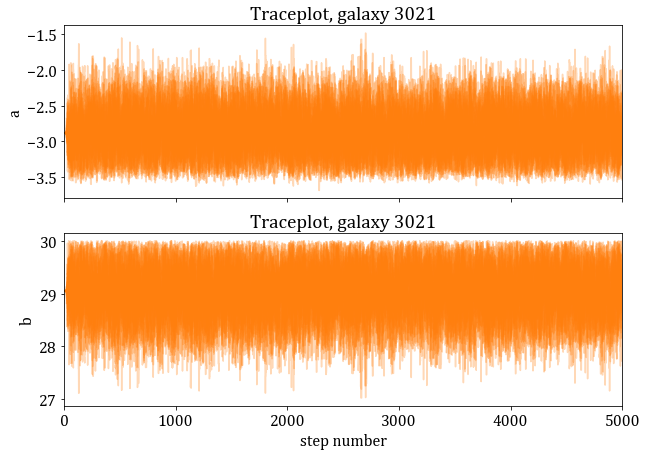

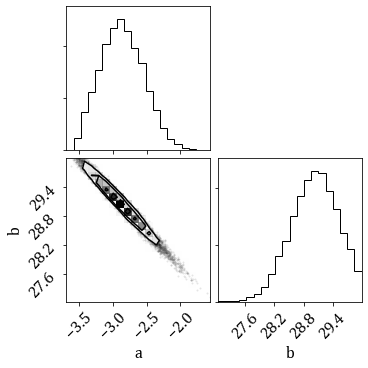

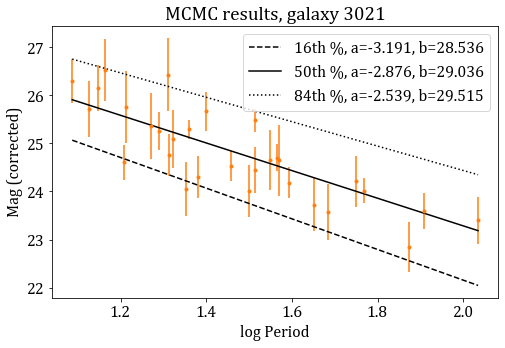

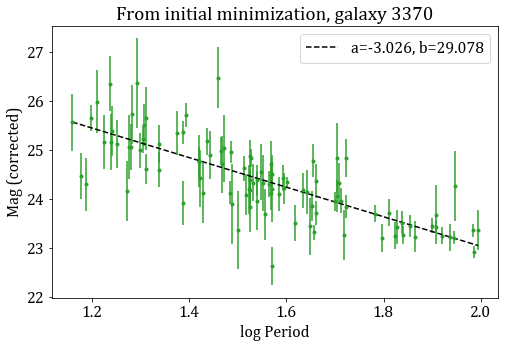

100%|██████████| 5000/5000 [00:07<00:00, 706.70it/s]


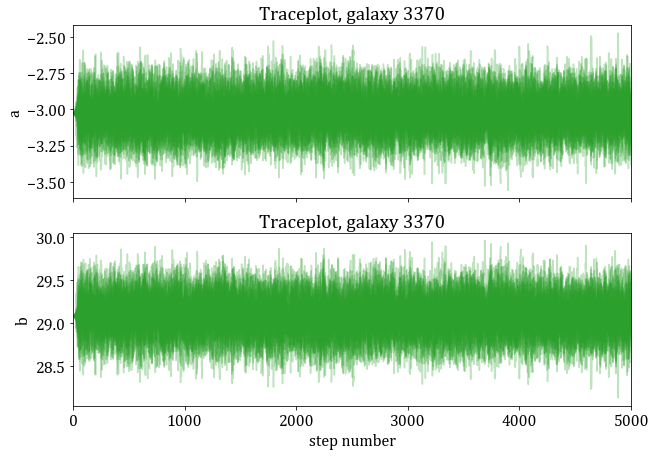

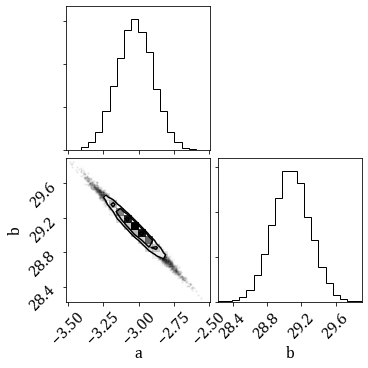

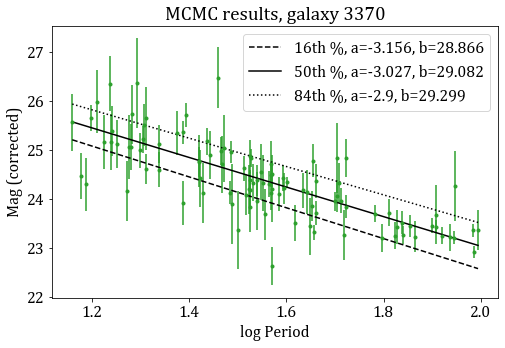

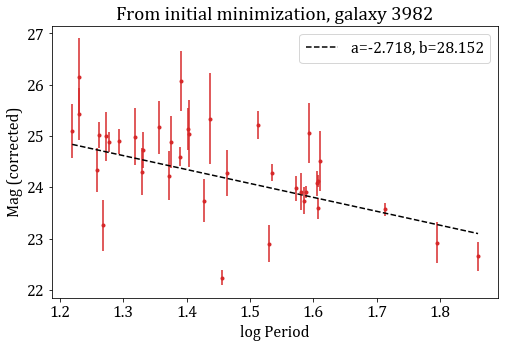

100%|██████████| 5000/5000 [00:06<00:00, 718.72it/s]


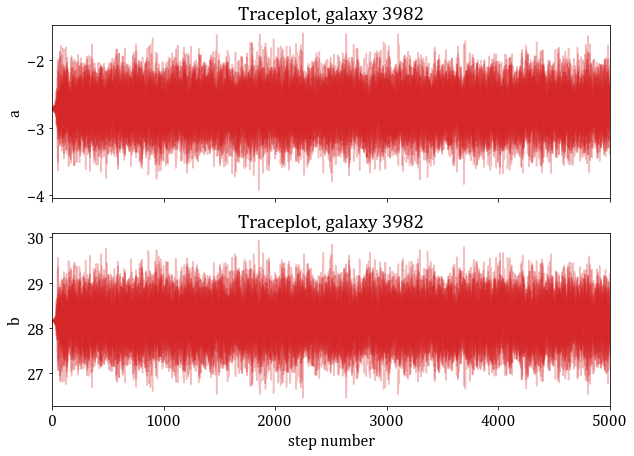

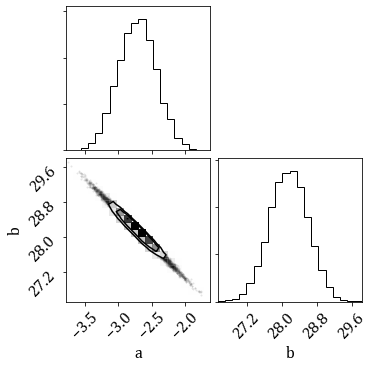

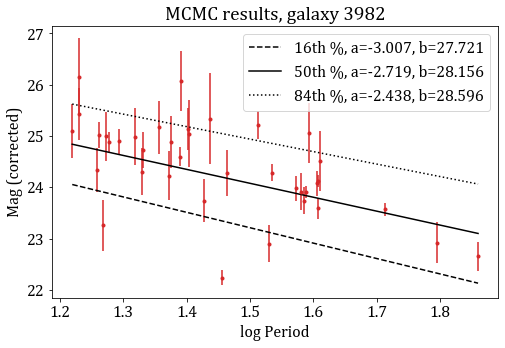

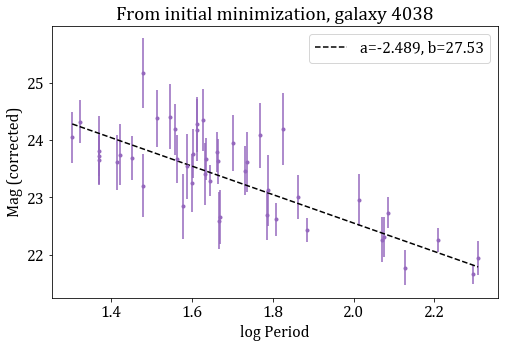

100%|██████████| 5000/5000 [00:07<00:00, 676.63it/s]


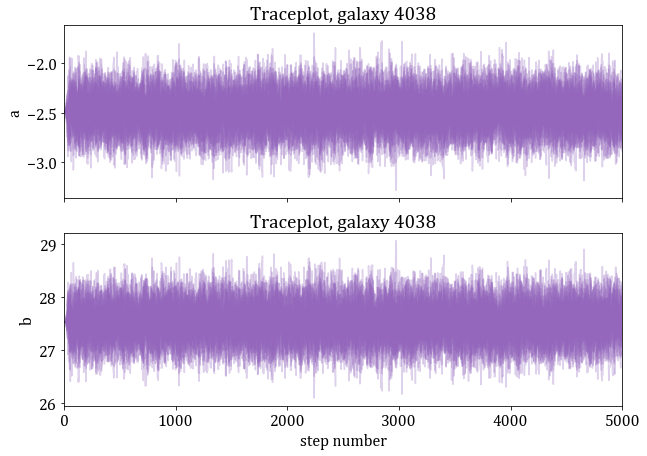

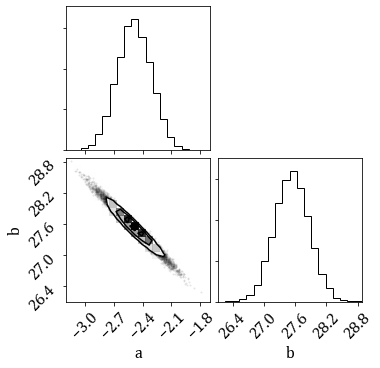

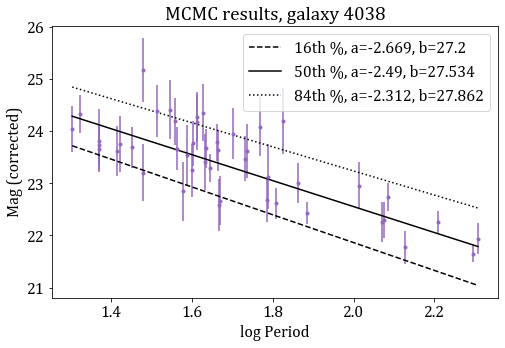

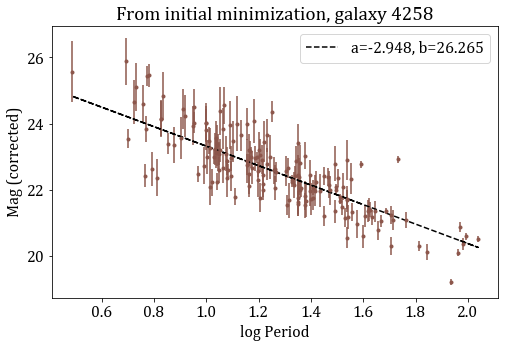

100%|██████████| 5000/5000 [00:08<00:00, 600.00it/s]


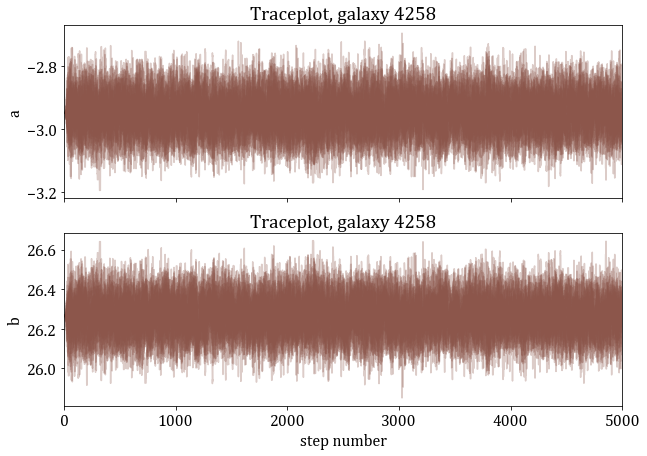

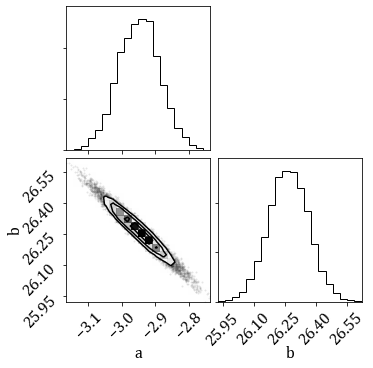

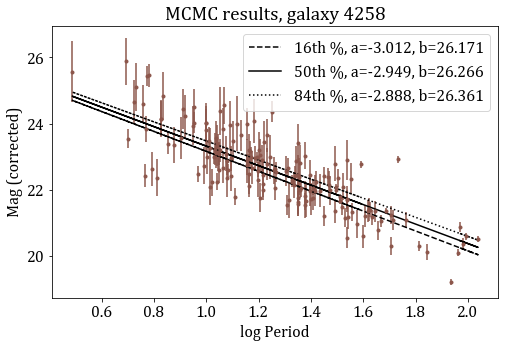

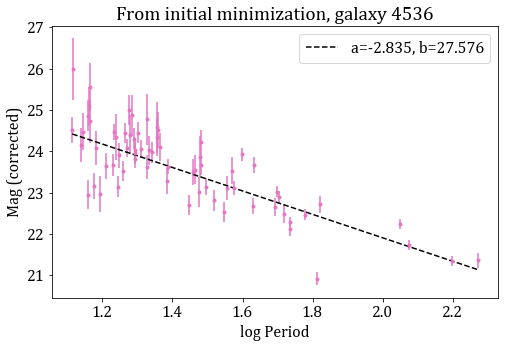

100%|██████████| 5000/5000 [00:09<00:00, 517.68it/s]


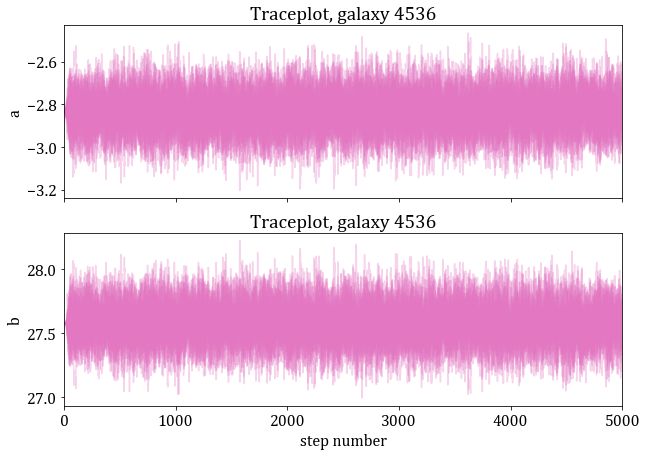

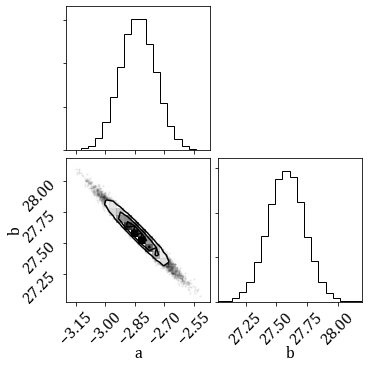

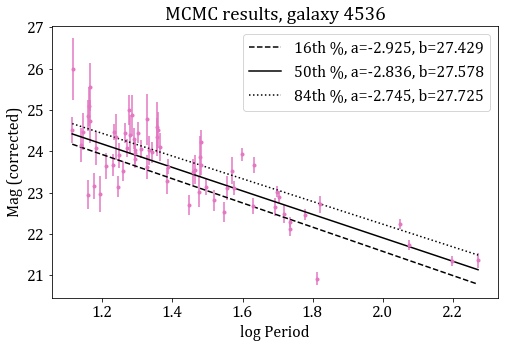

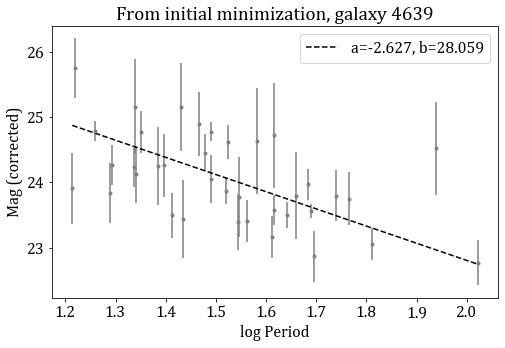

100%|██████████| 5000/5000 [00:07<00:00, 713.08it/s]


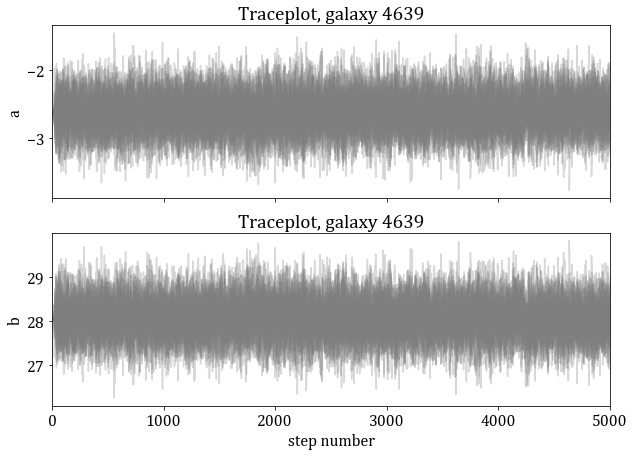

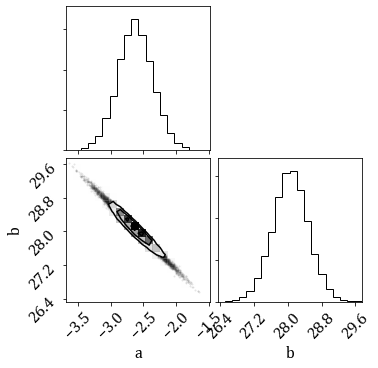

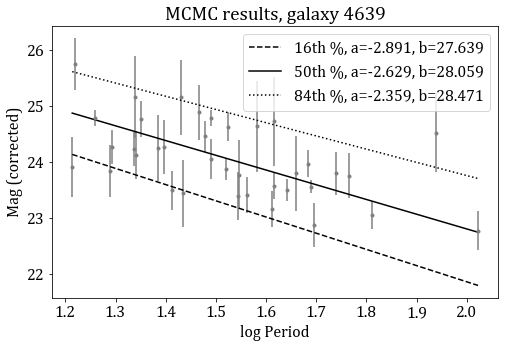

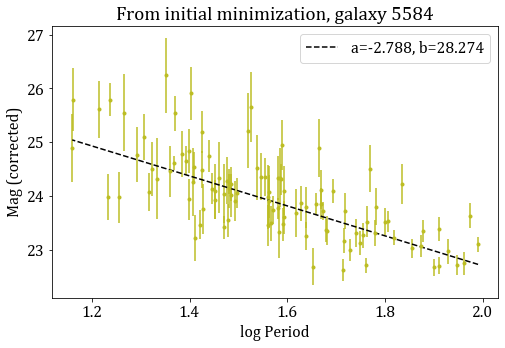

100%|██████████| 5000/5000 [00:08<00:00, 573.69it/s]


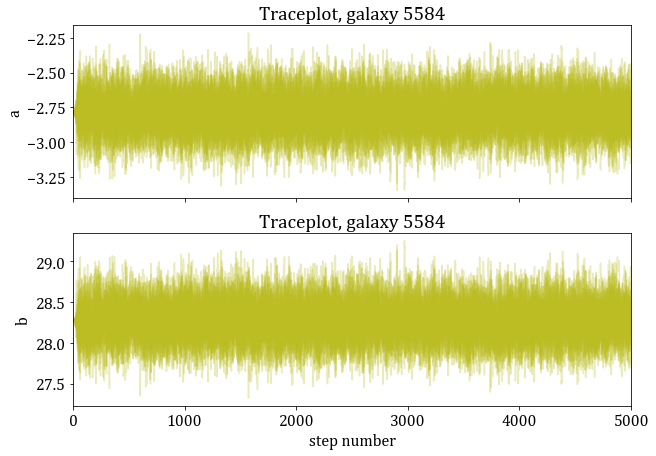

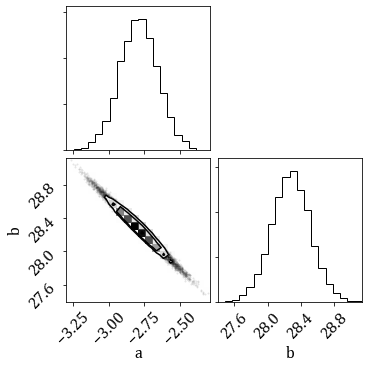

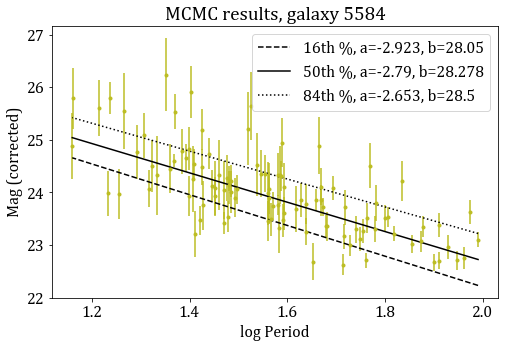

In [4]:
# do this all inside the for loop because do all steps for every host galaxy
yint = []
for i, ID in enumerate(hosts):
    ceph.select(ID)
    mobs = ceph.mobs
    logP = ceph.logP
    sigma_obs = ceph.sigma
    
    ####### initialize minimization #######
    ainit = -4
    binit = 27
    initial = np.array([ainit, binit])
    popt = minimize(ceph.negative_log_likelihood, initial)
    a, b = popt.x
    
    fig = plt.figure(figsize=(8,5))
    plt.errorbar(logP, mobs, yerr=sigma_obs, fmt='.', color=colors[i])
    plt.plot(logP, (a*logP + b), 'k--', label=r'a={}, b={}'.format(round(a,3), round(b,3)))
    plt.xlabel('log Period')
    plt.ylabel('Mag (corrected)')
    plt.title('From initial minimization, galaxy {}'.format(ID))
    plt.legend()
    plt.show()
    ####### end of minimization #######
    
    # looks dumb, but doing this because it uses ceph every time
    # define probability function using priors & likelihood
    def log_probability(theta):
        lp = log_prior(theta)
        if not np.isfinite(lp):
            return -np.inf
        return lp - ceph.negative_log_likelihood(theta) # important!! this is (- negative) = + log L
    
    ####### begin mcmc #######
    pos = popt.x + 1e-4 * np.random.randn(32, 2)
    nwalkers, ndim = pos.shape

    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability)
    sampler.run_mcmc(pos, 5000, progress=True)
    
    fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
    samples = sampler.get_chain()
    labels = ['a', 'b']
    for j in range(ndim):
        ax = axes[j]
        ax.plot(samples[:, :, j], color=colors[i], alpha=0.3)
        ax.set_xlim(0, len(samples))
        ax.set_ylabel(labels[j])
        ax.set_title('Traceplot, galaxy {}'.format(ID))
    axes[-1].set_xlabel("step number");
    plt.show()
    ####### end mcmc #######
    
    flat_samples = sampler.get_chain(discard=500, thin=15, flat=True)
    fig = corner.corner(flat_samples, labels=labels)
    plt.show()
    
    # get results of mcmc
    apercent = []
    bpercent = []
    for j in range(ndim):
        params = np.percentile(flat_samples[:, j], [16, 50, 84])
        if j == 0:
            apercent.append(params)
        elif j == 1:
            bpercent.append(params)
    fig = plt.figure(figsize=(8,5))
    plt.plot(logP, (apercent[0][0]*logP + bpercent[0][0]), 'k--', 
             label='16th %, a={}, b={}'.format(round(apercent[0][0],3), round(bpercent[0][0], 3)))
    plt.plot(logP, (apercent[0][1]*logP + bpercent[0][1]), 'k-', 
             label='50th %, a={}, b={}'.format(round(apercent[0][1],3), round(bpercent[0][1], 3)))
    plt.plot(logP, (apercent[0][2]*logP + bpercent[0][2]), 'k:', 
             label='84th %, a={}, b={}'.format(round(apercent[0][2],3), round(bpercent[0][2], 3)))
    plt.errorbar(logP, mobs, yerr=sigma_obs, fmt='.', color=colors[i])
    plt.xlabel('log Period')
    plt.ylabel('Mag (corrected)')
    plt.title('MCMC results, galaxy {}'.format(ID))
    plt.legend()
    plt.show()
    
    obj = {'ID':int(ID), 'b':bpercent[0][1]}
    yint.append(obj)

The least reasonable looking plot in my recreation of Fig. 7 from the paper is for host 4536 (galaxy 4258 is the calibration/reference host). While they trace the data just fine, the 16th and 84th percentiles don't fully encompass the data.

In [5]:
#Compare the intercept you find for the intercepts 𝜇0,𝑖−𝜇0,4258 vs Table 3 of Riess et al. 2011

# common nuisance parameter to all galaxies comes from host 4258, so use that galaxy's y-intercept as zp
zp = yint[5]['b']

for host in yint:
    mu = host['b'] - zp
    host['mu'] = mu

tab_3 = [{'ID':4536, 'mu':1.567}, {'ID':4639, 'mu':2.383}, {'ID':3370, 'mu':2.835}, 
         {'ID':3982, 'mu':2.475}, {'ID':3021, 'mu':3.138}, {'ID':1309, 'mu':3.276}, 
         {'ID':5584, 'mu':2.461}, {'ID':4038, 'mu':2.396}]

for i in yint:
    for j in tab_3:
        if i['ID'] == j['ID']:
            mu_err = 100 * ((j['mu'] - i['mu']) / j['mu'])
            print(r'ID {} has mu percent error {}% between my y-intercept, {}, and Table 3.'
                  .format(i['ID'], round(mu_err, 3), round(i['b'],3)))

ID 1309 has mu percent error 58.106% between my y-intercept, 27.639, and Table 3.
ID 3021 has mu percent error 11.734% between my y-intercept, 29.036, and Table 3.
ID 3370 has mu percent error 0.683% between my y-intercept, 29.082, and Table 3.
ID 3982 has mu percent error 23.648% between my y-intercept, 28.156, and Table 3.
ID 4038 has mu percent error 47.097% between my y-intercept, 27.534, and Table 3.
ID 4536 has mu percent error 16.263% between my y-intercept, 27.578, and Table 3.
ID 4639 has mu percent error 24.777% between my y-intercept, 28.059, and Table 3.
ID 5584 has mu percent error 18.242% between my y-intercept, 28.278, and Table 3.


Hmmm... these comparisons are not great. Host 3370 is the closest, but the others practically seem random.

# Q4.

## Riess et al. do a *simultaneous* fit to the Cepheids and SNe data (Table 3 of their paper). 

## I'm slightly less cruel, so you can take your intercepts $\mu_{0,i} - \mu_{0, 4258}$ and the re-express equation 4 using a substitution of equation 3.

## Write that expression down.

Equation 4:

$$ \log H_0 = \frac{(m^0_{v,4258} - \mu_{0,4258}) + 5a_v + 25}{5} $$

Equation 3:

$$ m^0_{v,i} = (\mu_{0,i} - \mu_{0,4258}) + m^0_{v,4258} $$

Rearranging Equation 3 to replace $m^0_{v,4258}$,

$$ m^0_{v,4258} = m^0_{v,i} - (\mu_{0,i} - \mu_{0,4258}) $$

Plugging back into Equation 4,

$$ \log H_0 = \frac{(m^0_{v,i} - (\mu_{0,i} - \mu_{0,4258}) - \mu_{0,4258}) + 5a_v + 25}{5} $$

Simplifying,

$$ \log H_0 = \frac{m^0_{v,i} - \mu_{0,i} + 5a_v + 25}{5} $$

Using known quantities, replace $\mu_{0,i} = b - zp_{W,4258} + \mu_{0,4258}$ (because recall that $b = (\mu_{0,i} - \mu_{0,4258}) + zp_{W,4258}$).

$$ \log H_0 = \frac{m^0_{v,i} - b + zp_{W,4258} - \mu_{0,4258} + 5a_v + 25}{5} $$

# Q5

## Using the supernova data in Table 3 (enter it into whatever data structure you deem best) and the distance modulus to NGC 4258 from [Humphreys et al., 2013 ](https://ui.adsabs.harvard.edu/abs/2013ApJ...775...13H/abstract) and using the simple sample statistics you learned in Week 1, estimate the Hubble constant.

In [6]:
tab_3_SN = [{'ID':4536, 'SN':'1981B', 'm+5a':15.147, 'b':27.566}, {'ID':4639, 'SN':'1990N', 'm+5a':16.040, 'b':28.055}, 
            {'ID':3370, 'SN':'1994ae', 'm+5a':16.545, 'b':29.095}, {'ID':3982, 'SN':'1998aq', 'm+5a':15.953, 'b':28.157},
            {'ID':3021, 'SN':'1995al', 'm+5a':16.699, 'b':28.987}, {'ID':1309, 'SN':'2002fk', 'm+5a':16.768, 'b':27.635}, 
            {'ID':5584, 'SN':'2007af', 'm+5a':16.274, 'b':28.275}, {'ID':4038, 'SN':'2007sr', 'm+5a':15.901, 'b':27.520}]

d = 7.6e6 #pc
mu_04258 = 5*np.log10(d) - 5

def calc_H0(m_5a, b):
    logH0 = (m_5a - b + zp - mu_04258 + 25) / 5
    return 10**(logH0)

all_H0 = []
for host in tab_3_SN:
    H0 = calc_H0(host['m+5a'], host['b'])
    all_H0.append(H0)

print('H0 estimates per host galaxy: {}'.format(all_H0))

H0 estimates per host galaxy: [77.37653060956032, 93.19857091368006, 72.8465943740296, 85.42977312821381, 82.18815911189247, 158.12817295218107, 93.80138546230687, 111.84311466539809]


In [7]:
from astropy.stats import sigma_clip
clipped_H0 = sigma_clip(all_H0, sigma=2)

print('Mean: {}'.format(np.mean(all_H0)))
print('Median: {}'.format(np.median(all_H0)))
print('Standard deviation: {}'.format(np.std(all_H0)))
print('')
print('Mean, clipped: {}'.format(np.mean(clipped_H0)))
print('Median, clipped: {}'.format(np.median(clipped_H0)))
print('Standard deviation, clipped: {}'.format(np.std(clipped_H0)))

Mean: 96.85153765215779
Median: 89.31417202094693
Standard deviation: 25.746858025690635

Mean, clipped: 84.14016893328052
Median, clipped: 89.31417202094693
Standard deviation, clipped: 7.682868412698901


/Users/melaniearchipley/miniconda3/envs/fds/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


Well, my values are ultimately not exactly what the Reiss paper obtained, but they are within some realm of reason for H0. Just barely. Most of the hosts give an overestimate of what is expected for H0, and given the big discrepancies between my values for $b$ and those in Table 3, I should not be surprised at this result.